In [36]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import json
from distutils.dir_util import copy_tree
sns.set_theme(style="ticks")

from notebook_functions import get_balanced_df

<Axes: ylabel='Count'>

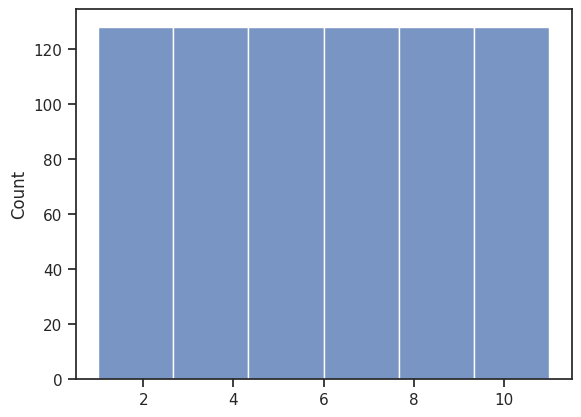

In [51]:
n_gt_actions = []
dataset_folder = "dataset/blocksworld/blocksworld_2000_4_blocks_balanced"
dataset_folder = Path(dataset_folder)
for folder in list(dataset_folder.glob("*")):
    gt_file = folder / "ground_truth_plan.txt"
    ground_truth_plan = open(gt_file, "r").read().split("\n")
    n_gt_actions.append(len(ground_truth_plan)-2)
n_gt_actions = np.array(n_gt_actions)
sns.histplot(n_gt_actions, bins=6)

<Axes: ylabel='Count'>

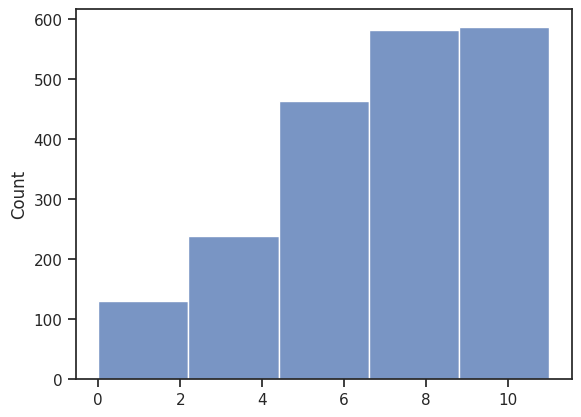

In [9]:
n_gt_actions = []
dataset_folder = "dataset/blocksworld/blocksworld_2000_4_blocks"
dataset_folder = Path(dataset_folder)
for folder in list(dataset_folder.glob("*")):
    gt_file = folder / "ground_truth_plan.txt"
    ground_truth_plan = open(gt_file, "r").read().strip().split("\n")
    n_gt_actions.append(len(ground_truth_plan) - 1)
n_gt_actions = np.array(n_gt_actions)
sns.histplot(n_gt_actions, bins=5)

In [26]:
n_gt_actions = []
dataset_folder = "dataset/blocksworld/blocksworld_2000_4_blocks"
dataset_folder = Path(dataset_folder)
for folder in list(dataset_folder.glob("*")):
    gt_file = folder / "ground_truth_plan.txt"
    ground_truth_plan = open(gt_file, "r").read().split("\n")
    n_gt_actions.append([int(folder.stem[9:]), len(ground_truth_plan) - 1])

In [34]:
df = pd.DataFrame(n_gt_actions, columns=["instance_id", "ground_truth_n_actions"])
df = df[df["ground_truth_n_actions"] > 0]

df_balanced = get_balanced_df(df)

In [45]:
balanced_dataset_folder = Path("dataset/blocksworld/blocksworld_2000_4_blocks_balanced")
balanced_dataset_folder.mkdir(parents=True, exist_ok=True)
for instance_id in df_balanced["instance_id"].to_list():
    instance_folder = dataset_folder / f"instance_{instance_id}"
    new_instance_folder = balanced_dataset_folder / f"instance_{instance_id}"
    copy_tree(str(instance_folder), str(new_instance_folder))

In [35]:
df_balanced

,instance_id,ground_truth_n_actions
2,1593,10
8,1847,10
26,1682,10
41,136,10
42,835,10
...,...,...
1917,1643,12
1924,1103,12
1929,337,12
1962,610,12


In [33]:
df_balanced.groupby("ground_truth_n_actions").count()

,instance_id
ground_truth_n_actions,
2,128
4,128
6,128
8,128
10,128
12,128


<Axes: ylabel='Count'>

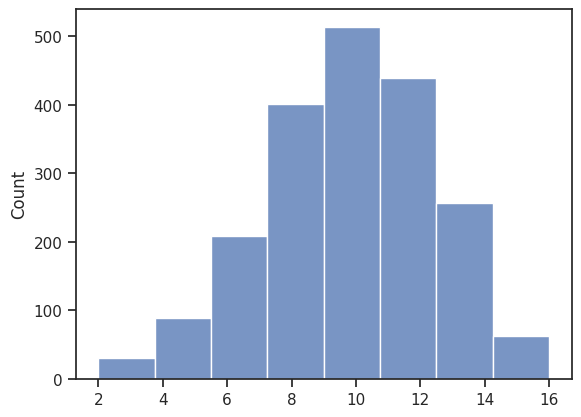

In [4]:
n_gt_actions = []
dataset_folder = "dataset/blocksworld/blocksworld_2000_5_blocks"
dataset_folder = Path(dataset_folder)
for folder in list(dataset_folder.glob("*")):
    gt_file = folder / "ground_truth_plan.txt"
    ground_truth_plan = open(gt_file, "r").read().strip().split("\n")
    n_gt_actions.append(len(ground_truth_plan))
n_gt_actions = np.array(n_gt_actions)
sns.histplot(n_gt_actions, bins=8)

<Axes: ylabel='Count'>

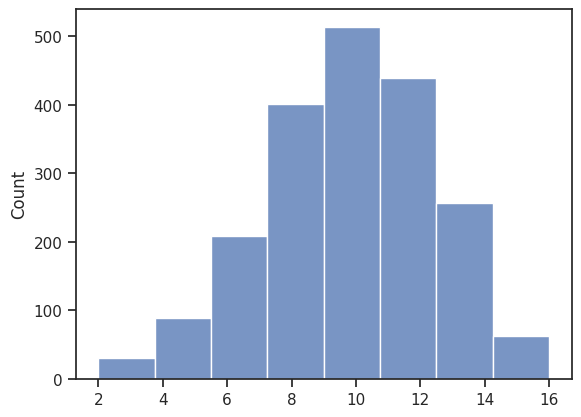

In [29]:
n_gt_actions = []
dataset_folder = "dataset/blocksworld/blocksworld_2000_6_blocks"
dataset_folder = Path(dataset_folder)
for folder in list(dataset_folder.glob("*")):
    gt_file = folder / "ground_truth_plan.txt"
    ground_truth_plan = open(gt_file, "r").read().strip().split("\n")
    n_gt_actions.append(len(ground_truth_plan))
n_gt_actions = np.array(n_gt_actions)
sns.histplot(n_gt_actions, bins=8)

In [7]:
with open("data/prompts/generated_basic/task_1_plan_generation.json") as f:
    data = json.load(f)["instances"]
    f.close()

In [25]:
n_actions = []
for i in range(500):
    instance = data[i]
    ground_truth_plan = instance["ground_truth_plan"].split("\n")
    n_actions.append(len(ground_truth_plan)-1)

In [28]:
n_actions = np.array(n_actions)
df = pd.DataFrame(n_actions[:100], columns=["n_actions"])

In [29]:
df.groupby("n_actions")["n_actions"].count()

n_actions
2      9
4     12
6     21
8     26
10    25
12     7
Name: n_actions, dtype: int64

In [22]:
df

,n_actions
0,5
1,11
2,11
3,3
4,11
...,...
495,11
496,9
497,7
498,7


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
x = np.array([5, 6, 7, 8, 9])
y = np.array([55, 75, 75, 90, 95])

y_1 = 5*x + 40
y_2 = 6*x + 30

In [16]:
from sklearn.linear_model import LinearRegression

<Axes: >

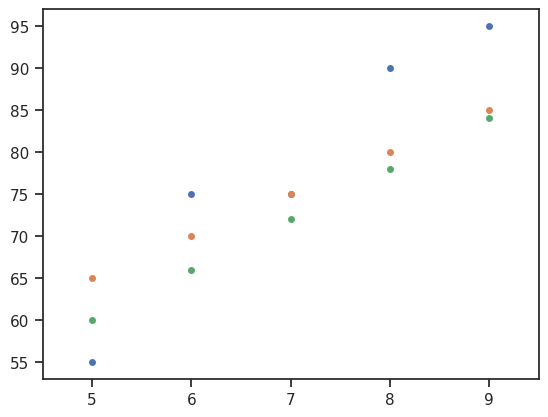

In [34]:
sns.stripplot(x=x, y=y)
sns.stripplot(x=x, y=y_1)
sns.stripplot(x=x, y=y_2)

In [17]:
l = LinearRegression()

In [19]:
m = l.fit(x.reshape(-1, 1), y)

In [23]:
m.coef_

array([9.5])

In [15]:
y_2

array([60, 66, 72, 78, 84])

In [14]:
mean_squared_error(y, y_1), mean_squared_error(y, y_2)

(65.0, 76.0)

In [28]:
65*5, 76*5

(325, 380)

In [25]:
mean_absolute_error(y, y_1), mean_absolute_error(y, y_2)

(7.0, 8.0)

In [12]:
y_2

array([60, 66, 72, 78, 84])

In [5]:
((y-y_1)**2).mean()

65.0

In [6]:
((y-y_2)**2).mean()

76.0

In [10]:
np.abs(y-y_1).mean()

7.0

In [27]:
y-y_1

array([-10,   5,   0,  10,  10])

In [1]:
import numpy as np

In [2]:
a = np.array([7, 10, 13])
b = np.array([9, 10, 11])

a.mean(), b.mean()

(10.0, 10.0)

In [3]:
a.std(), b.std()

(2.449489742783178, 0.816496580927726)

In [2]:
x = [20, 16, 20, 31, 17, 20]

<Axes: >

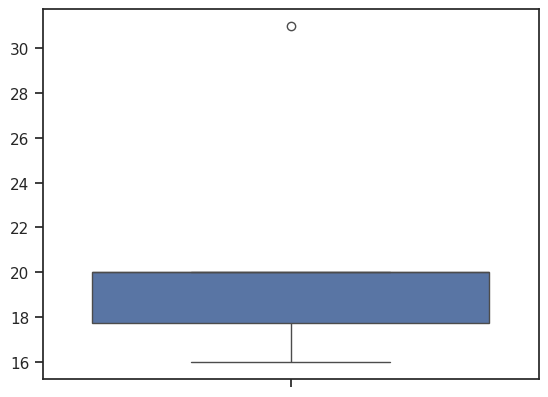

In [3]:
sns.boxplot(x)